In [1]:
#a1
import pandas as pd
import numpy as np
from math import log2

# Sample dataset
data = {'age': ['<=30', '<=30', '31..40', '>40', '>40', '>40', '31..40', '<=30', '<=30', '>40', '<=30', '31..40', '31..40', '>40'],
        'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
        'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
        'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
        'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']}
df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = -np.sum([(counts[i]/np.sum(counts))*log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_value

# Function to calculate information gain
def info_gain(data, feature, target="buys_computer"):
    total_entropy = entropy(data[target])
    vals, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[feature]==vals[i]).dropna()[target]) for i in range(len(vals))])
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Calculate Information Gain for each feature
features = df.columns[:-1]  # All columns except the target
for feature in features:
    print(f'Information Gain for {feature}: {info_gain(df, feature)}')


Information Gain for age: 0.24674981977443933
Information Gain for income: 0.02922256565895487
Information Gain for student: 0.15183550136234159
Information Gain for credit_rating: 0.04812703040826949


In [2]:
#a2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Encoding categorical data for the decision tree
df_encoded = pd.get_dummies(df.drop('buys_computer', axis=1))
y = df['buys_computer'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.3, random_state=42)

# Build Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get depth of the tree
print("Tree Depth:", model.get_depth())


Tree Depth: 3


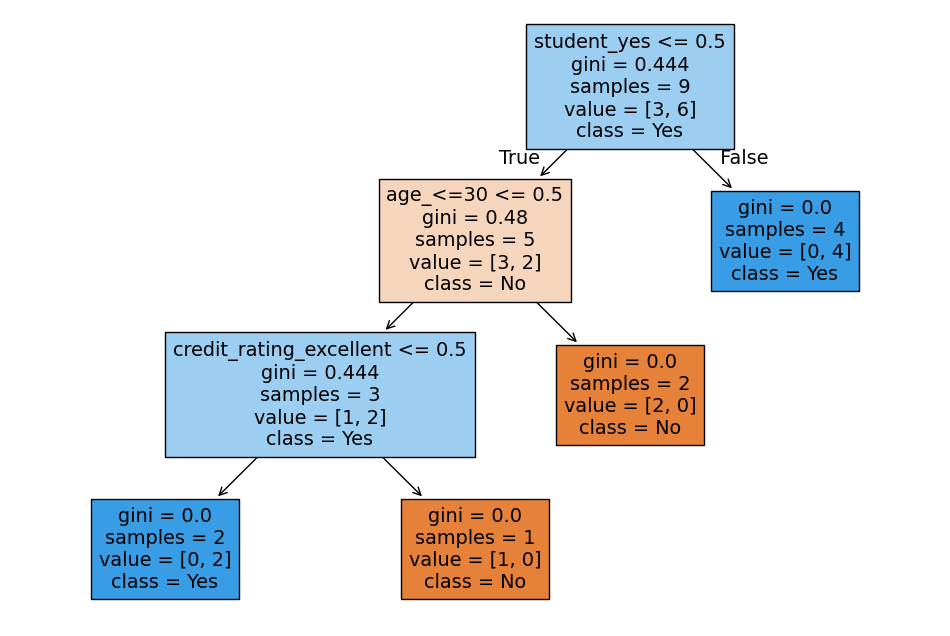

In [3]:
#a3
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=df_encoded.columns, class_names=['No', 'Yes'])
plt.show()


Missing values in 'CLASS' column: 3
Training Accuracy: 0.44556451612903225, Test Accuracy: 0.45297805642633227


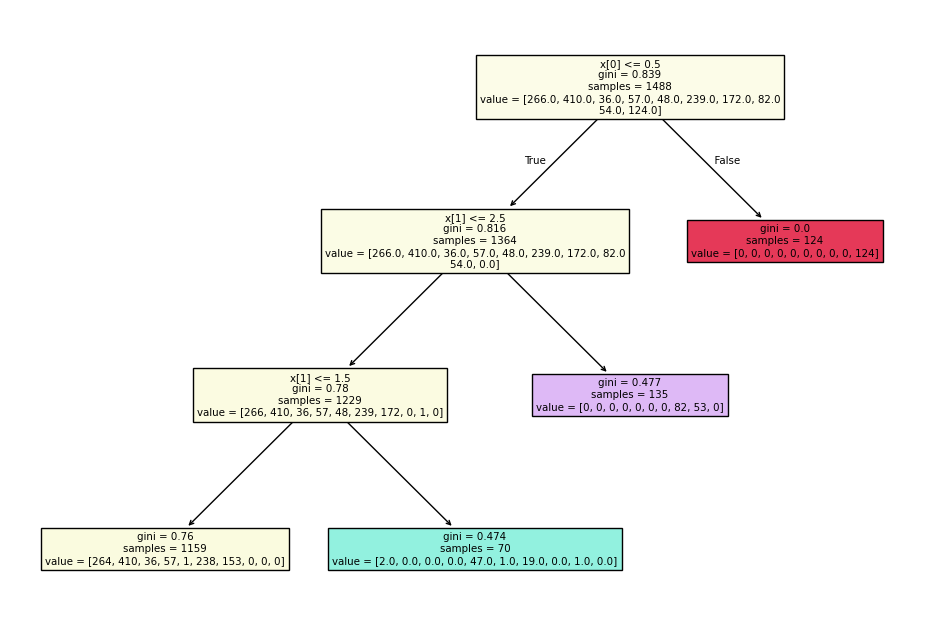

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the CTG dataset
ctg_df = pd.read_csv('CTG.csv')

# Check for missing values in 'CLASS' column and handle them
print("Missing values in 'CLASS' column:", ctg_df['CLASS'].isnull().sum())

# Drop rows where 'CLASS' is NaN
ctg_df = ctg_df.dropna(subset=['CLASS'])

# Use relevant columns for features and target
X = ctg_df[['SUSP', 'NSP']]  # Features
y = ctg_df['CLASS']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Decision Tree
model_ctg = DecisionTreeClassifier()
model_ctg.fit(X_train, y_train)

# Training and Test Accuracy
train_acc = model_ctg.score(X_train, y_train)
test_acc = model_ctg.score(X_test, y_test)
print(f"Training Accuracy: {train_acc}, Test Accuracy: {test_acc}")

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model_ctg, filled=True)
plt.show()


Training Accuracy: 0.44556451612903225, Test Accuracy: 0.45297805642633227


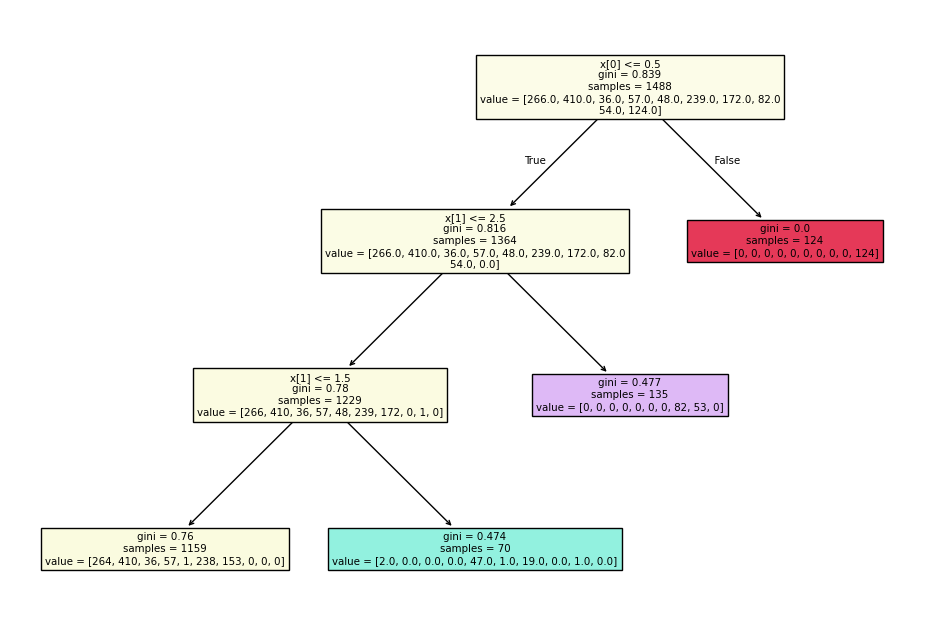

In [9]:
# Imposing max_depth constraint
model_max_depth = DecisionTreeClassifier(max_depth=5)
model_max_depth.fit(X_train, y_train)

# Training and Test Accuracy with max_depth constraint
train_acc = model_max_depth.score(X_train, y_train)
test_acc = model_max_depth.score(X_test, y_test)
print(f"Training Accuracy: {train_acc}, Test Accuracy: {test_acc}")

# Plot the tree with max_depth constraint
plt.figure(figsize=(12, 8))
plot_tree(model_max_depth, filled=True)
plt.show()


Training Accuracy (Entropy): 0.44556451612903225, Test Accuracy (Entropy): 0.45297805642633227


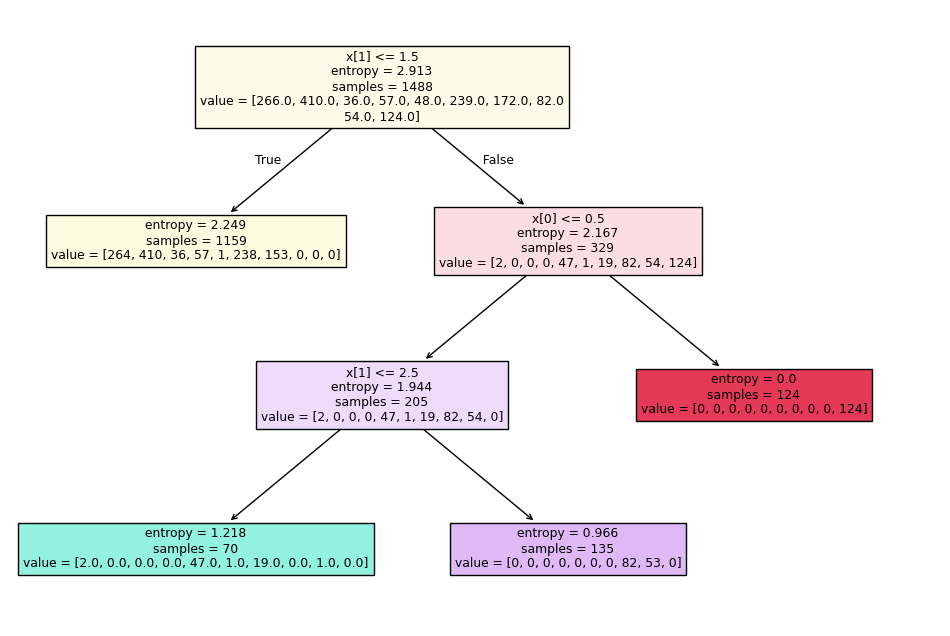

In [10]:
# Change criterion to 'entropy'
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

# Training and Test Accuracy with entropy criterion
train_acc_entropy = model_entropy.score(X_train, y_train)
test_acc_entropy = model_entropy.score(X_test, y_test)
print(f"Training Accuracy (Entropy): {train_acc_entropy}, Test Accuracy (Entropy): {test_acc_entropy}")

# Plot the tree with entropy criterion
plt.figure(figsize=(12, 8))
plot_tree(model_entropy, filled=True)
plt.show()
